In [20]:
# for data organization:
import pandas as pd
import numpy as np

# for machine learning:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, r2_score

# the most XX library for plots
import matplotlib.pyplot as plt


In [21]:
data_url = 'https://raw.githubusercontent.com/data-to-insight/ERN-sessions/main/data/diabetes_data.csv'
df = pd.read_csv(data_url)
df

# to check what the lowest BMI is - df['BMI'].min() 
# remove zeros:
df = df[(df['BMI'].astype('int') != 0) & (df['Glucose'].astype('int') != 0)]
    # the astype because if it's a string so it converts first and then removes all zeros


In [22]:
# Independent variables (= that's what we are measuring)
    # we use capital X
X = df['BMI'].to_numpy().reshape(-1,1)
    # "reshape(-1,1)" changes from y axis to x axis, as it's a list originally
    # we use numpy as massive datasets can take too long to work with if we use just simple lists

# Dependent variables
    # we use small y
y = df['Glucose'].to_numpy().reshape(-1,1)

# split the data in 70/30 parts:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [23]:
# to build the model, you need to build an empty container:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)


LinearRegression()

In [24]:
y_pred = regr.predict(X_test)

In [25]:
print(f'Coef of det: {regr.coef_}.')


Coef of det: [[1.1595089]].


In [26]:
print(f'Mean squared error: {mean_squared_log_error(y_test, y_pred)}.')


Mean squared error: 0.06506178604155914.


In [27]:
print(f'r squared: {r2_score(y_test, y_pred)}.')

r squared: 0.01476264050850784.


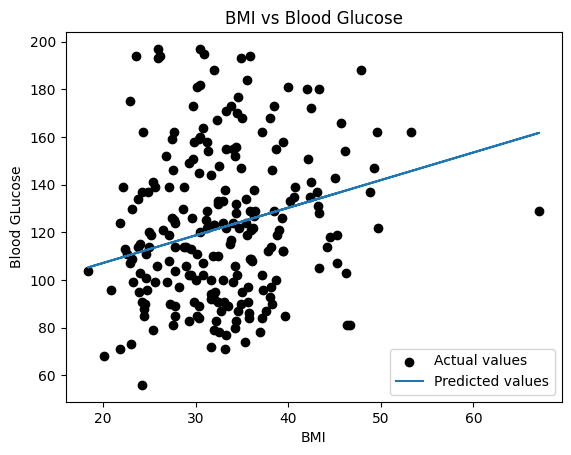

In [30]:
plt.scatter(X_test, y_test, color="black", label='Actual values')
# add lines:
plt.plot(X_test, y_pred, label='Predicted values')
    # and this line basically presents the linear regression

plt.xlabel('BMI')
plt.ylabel('Blood GLucose')
plt.title('BMI vs Blood Glucose')
plt.legend(loc="lower right")

plt.show()


In [33]:
prediction_df = pd.DataFrame()

prediction_df['BMI'] = np.arange(60, 71)

prediction_df['Glucose'] = regr.predict(np.arange(60, 71).reshape(-1,1))

prediction_df


,BMI,Glucose
0,60,153.564949
1,61,154.724458
2,62,155.883967
3,63,157.043475
4,64,158.202984
5,65,159.362493
6,66,160.522002
7,67,161.681511
8,68,162.841020
9,69,164.000529


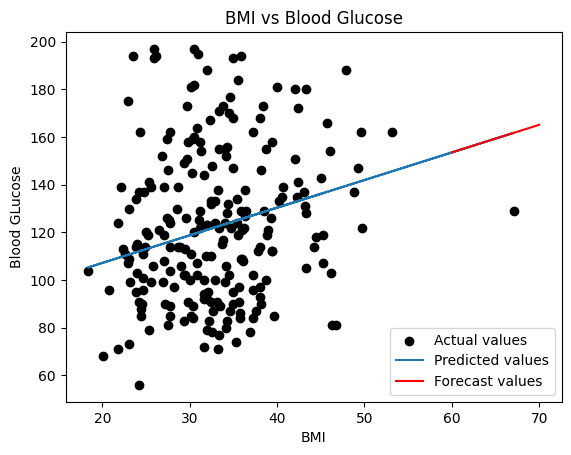

In [34]:
plt.scatter(X_test, y_test, color="black", label='Actual values')
# add lines:
plt.plot(X_test, y_pred, label='Predicted values')
    # and this line basically presents the linear regression
plt.plot(prediction_df['BMI'], prediction_df['Glucose'], color='Red', label='Forecast values')

plt.xlabel('BMI')
plt.ylabel('Blood GLucose')
plt.title('BMI vs Blood Glucose')
plt.legend(loc="lower right")

plt.show()


In [35]:
# selecting data
df = df[df['Insulin'].astype('int') != 0]

X = df[['BMI', 'Insulin']]
y = df['Glucose'].to_numpy().reshape(-1,1)


# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


# fitting and predicting
mv_regr = linear_model.LinearRegression()

mv_regr.fit(X_train, y_train)
y_pred = mv_regr.predict(X_test)


# look at model quality 
print(f'Coef Det: {mv_regr.coef_}')
print(f'MSE: {mean_squared_log_error(y_test, y_pred)}')
print(f'R squared: {r2_score(y_test, y_pred)}')

# make predictions




Coef Det: [[0.42359183 0.16437135]]
MSE: 0.04399725892567003
R squared: 0.17661432608415184
